# Network Motifs 

Below are few "toy" examples demonstrating how to use the package for both counting network motifs (triads) and visualizing the results.

In [1]:
import netsci.models.random as nsr
import netsci.metrics.motifs as nsm
import netsci.visualization as nsv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 144

## Counting motif frequencies

First, let's generate a sample adjacency matrix using the [Erdős–Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). 

In [3]:
n = 500    # The number of nodes
p = 0.1    # The probability for a connection (or, "sparsity")

A = nsr.erdos_renyi(n, p)

Count all 16 triplet motifs using a naïve brute-force algorithm (complexity of O($n^3$)).

In [4]:
nsm.motifs(A, algorithm='brute-force')

array([11040390,  7301442,   425147,   805446,   400906,   401677,
          88803,    94130,    93852,    29547,     5329,    10337,
           5181,     5053,     1236,       24])

Efficient counting of all 13 connected triplets (using the algorithm given in [Itzhack *et al.* (2007)](https://doi.org/10.1016/j.physa.2007.02.102)).

In [5]:
f = nsm.motifs(A)
print(f)

[    -1     -1     -1 805446 400906 401677  88803  94130  93852  29547
   5329  10337   5181   5053   1236     24]


## Simple plotting

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


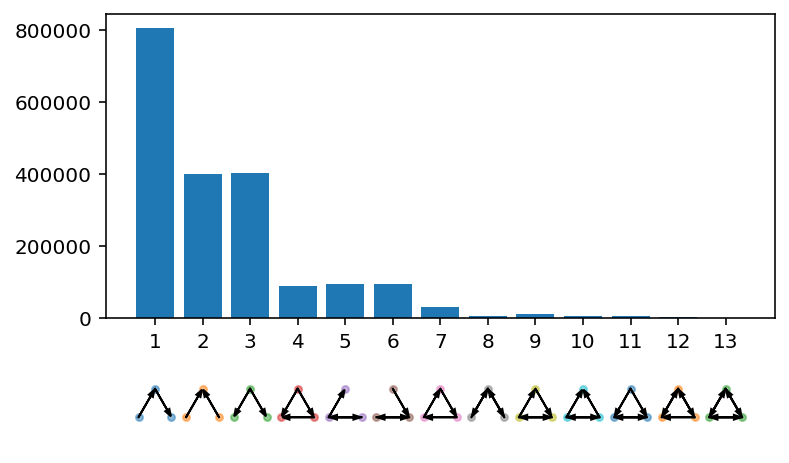

In [6]:
nsv.bar_motifs(f)

The plotted order is by the convention as in [Gal *et al.* (2017)](http://dx.doi.org/10.1038/nn.4576). We can also use different order (see below).

To get the patterns explicitely:

In [7]:
nsm.triad_patterns()

[array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]), array([[0, 1, 0],
        [0, 0, 0],
        [0, 0, 0]]), array([[0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]]), array([[0, 1, 0],
        [0, 0, 0],
        [1, 0, 0]]), array([[0, 0, 0],
        [1, 0, 0],
        [1, 0, 0]]), array([[0, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]), array([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]]), array([[0, 0, 0],
        [0, 0, 1],
        [1, 1, 0]]), array([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0]]), array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]]), array([[0, 1, 1],
        [1, 0, 0],
        [1, 0, 0]]), array([[0, 1, 0],
        [0, 0, 1],
        [1, 1, 0]]), array([[0, 0, 0],
        [1, 0, 1],
        [1, 1, 0]]), array([[0, 1, 1],
        [0, 0, 1],
        [0, 1, 0]]), array([[0, 1, 1],
        [1, 0, 1],
        [1, 0, 0]]), array([[0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]])]

To visualize them:

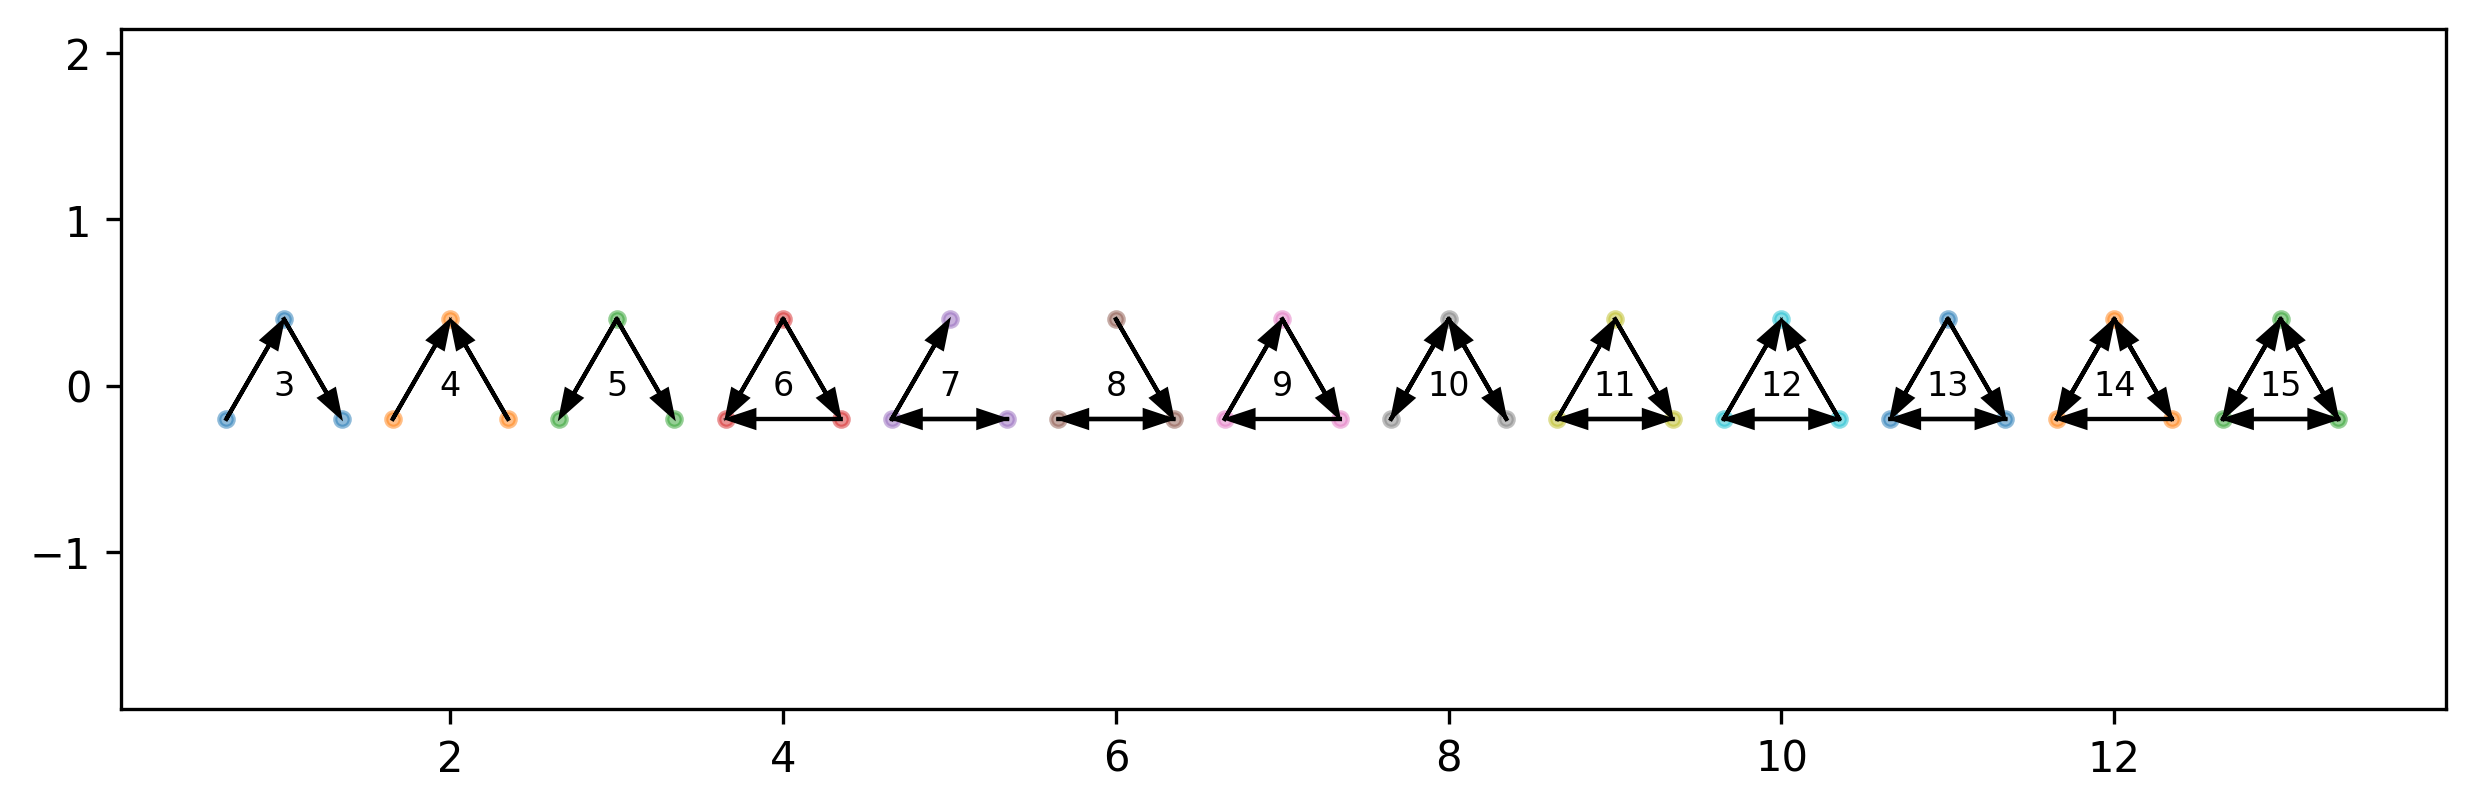

In [8]:
plt.figure(figsize=(10, 3), dpi=300)
nsv.plot_all_triads(ax=plt.gca())

## Analytical solution for Erdős–Rényi model

The mean frequencies of triads in an Erdős–Rényi model can be computed analytically.

Counting motifs..
Plotting..
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


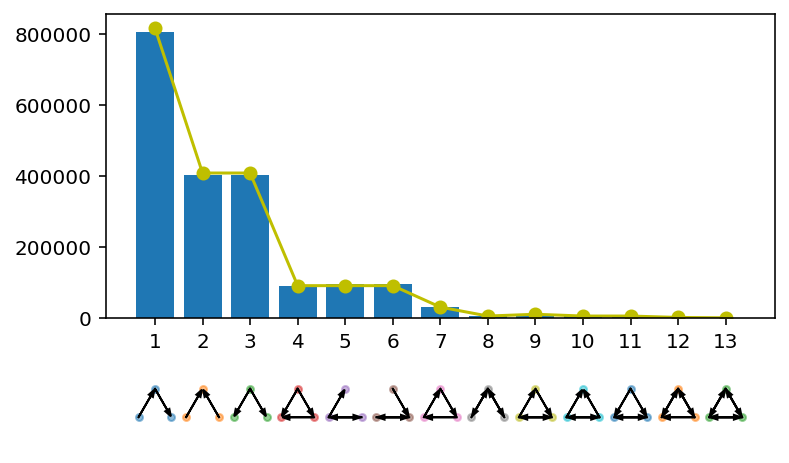

In [9]:
from scipy.special import comb

C3n = comb(n, 3)
f_analytic = C3n * nsm.triad_proba(p)

print("Counting motifs..")
f = nsm.motifs(A)

print("Plotting..")
nsv.bar_motifs(f, f_analytic)

## Extra

For instance, the convention used in [Rubinov and Sporns (2010)](http://dx.doi.org/10.1016/j.neuroimage.2009.10.003):

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


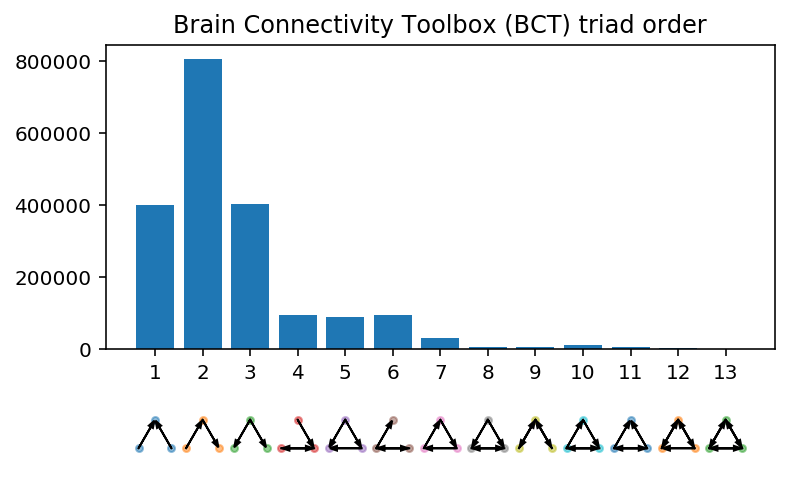

In [10]:
nsv.bar_motifs(f, order=nsm.triad_order_bct, title='Brain Connectivity Toolbox (BCT) triad order')

## References
* Gal, E., London, M., Globerson, A., Ramaswamy, S., Reimann, M. W., … Segev, I. (2017). Rich cell-type-specific network topology in neocortical microcircuitry. *Nat Neurosci*, **20(7)**, 1004–1013. Retrieved from http://dx.doi.org/10.1038/nn.4576
* Itzhack, R., Mogilevski, Y., & Louzoun, Y. (2007). An optimal algorithm for counting network motifs. *Physica A: Statistical Mechanics and Its Applications*, **381**, 482–490. https://doi.org/10.1016/j.physa.2007.02.102
* Rubinov, M., & Sporns, O. (2010). Complex network measures of brain connectivity: Uses and interpretations. *NeuroImage*, **52(3)**, 1059–1069. https://doi.org/10.1016/j.neuroimage.2009.10.003